In [12]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array, ImageDataGenerator
%matplotlib inline

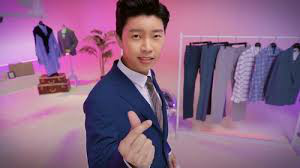

In [2]:
img=load_img("myhero.jpeg")
img

In [5]:
data = img_to_array(img)
data.shape

(168, 300, 3)

In [6]:
samples=np.expand_dims(data,0)
samples.shape

(1, 168, 300, 3)

In [7]:
#좌우 이동범위 설정
datagen=ImageDataGenerator(width_shift_range=[-50,50])

In [8]:
it= datagen.flow(samples, batch_size=1)

In [9]:
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch=it.next()
    image=batch[0].astype('uint8') #출력용
    plt.imshow(image)
plt.title("이미지 증식")
plt.show()

In [11]:
samples=np.expand_dims(data,0)

datagen=ImageDataGenerator(height_shift_range=0.5)
it= datagen.flow(samples, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch=it.next()
    image=batch[0].astype('uint8') #출력용
    plt.imshow(image)
plt.title("이미지 증식")
plt.show()

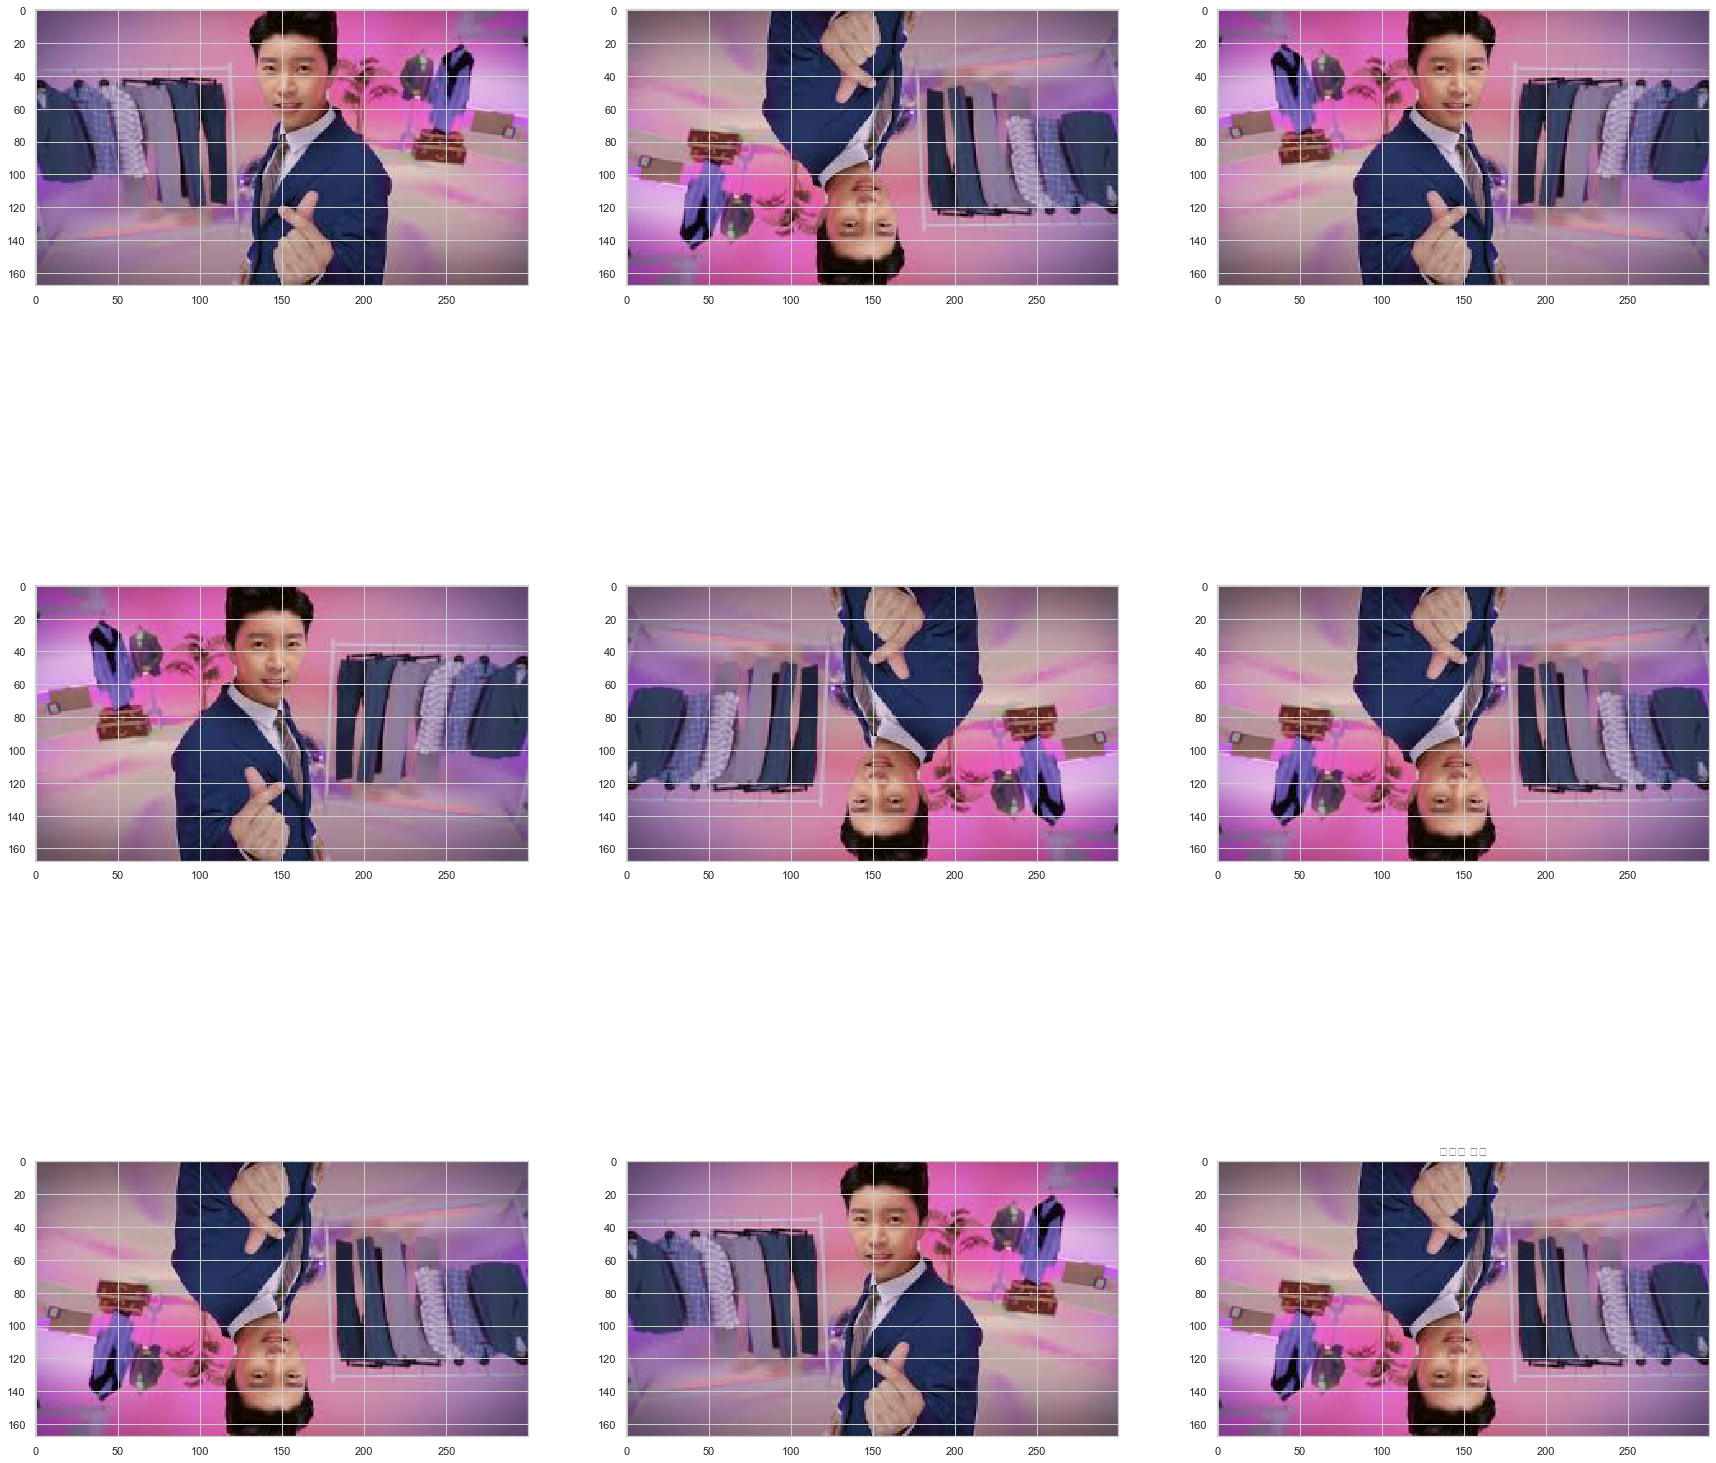

In [13]:
samples=np.expand_dims(data,0)

datagen=ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
it= datagen.flow(samples, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch=it.next()
    image=batch[0].astype('uint8') #출력용
    plt.imshow(image)
plt.title("이미지 증식")
plt.show()

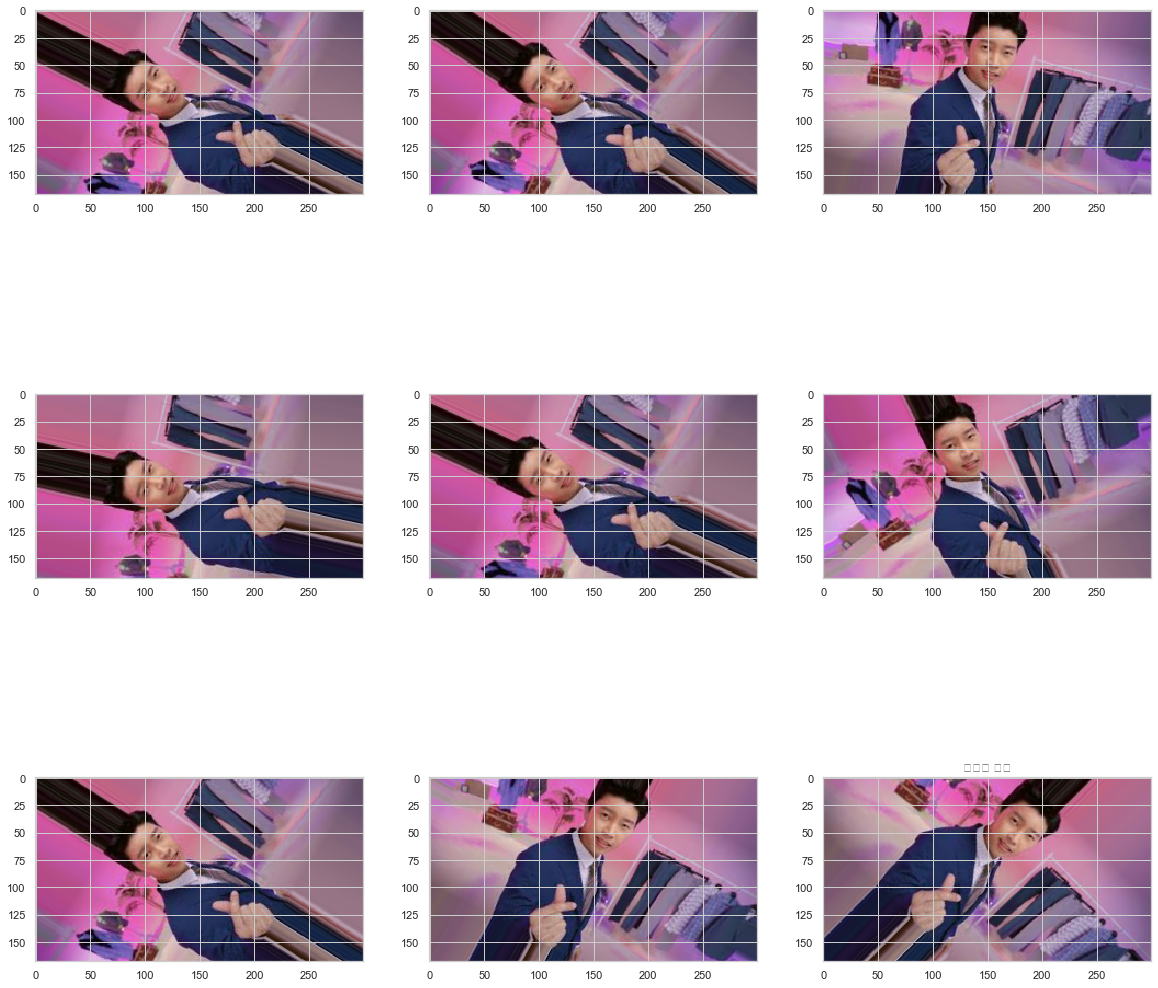

In [14]:
samples=np.expand_dims(data,0)

datagen=ImageDataGenerator(rotation_range=90)
it= datagen.flow(samples, batch_size=1)
fig=plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch=it.next()
    image=batch[0].astype('uint8') #출력용
    plt.imshow(image)
plt.title("이미지 증식")
plt.show()

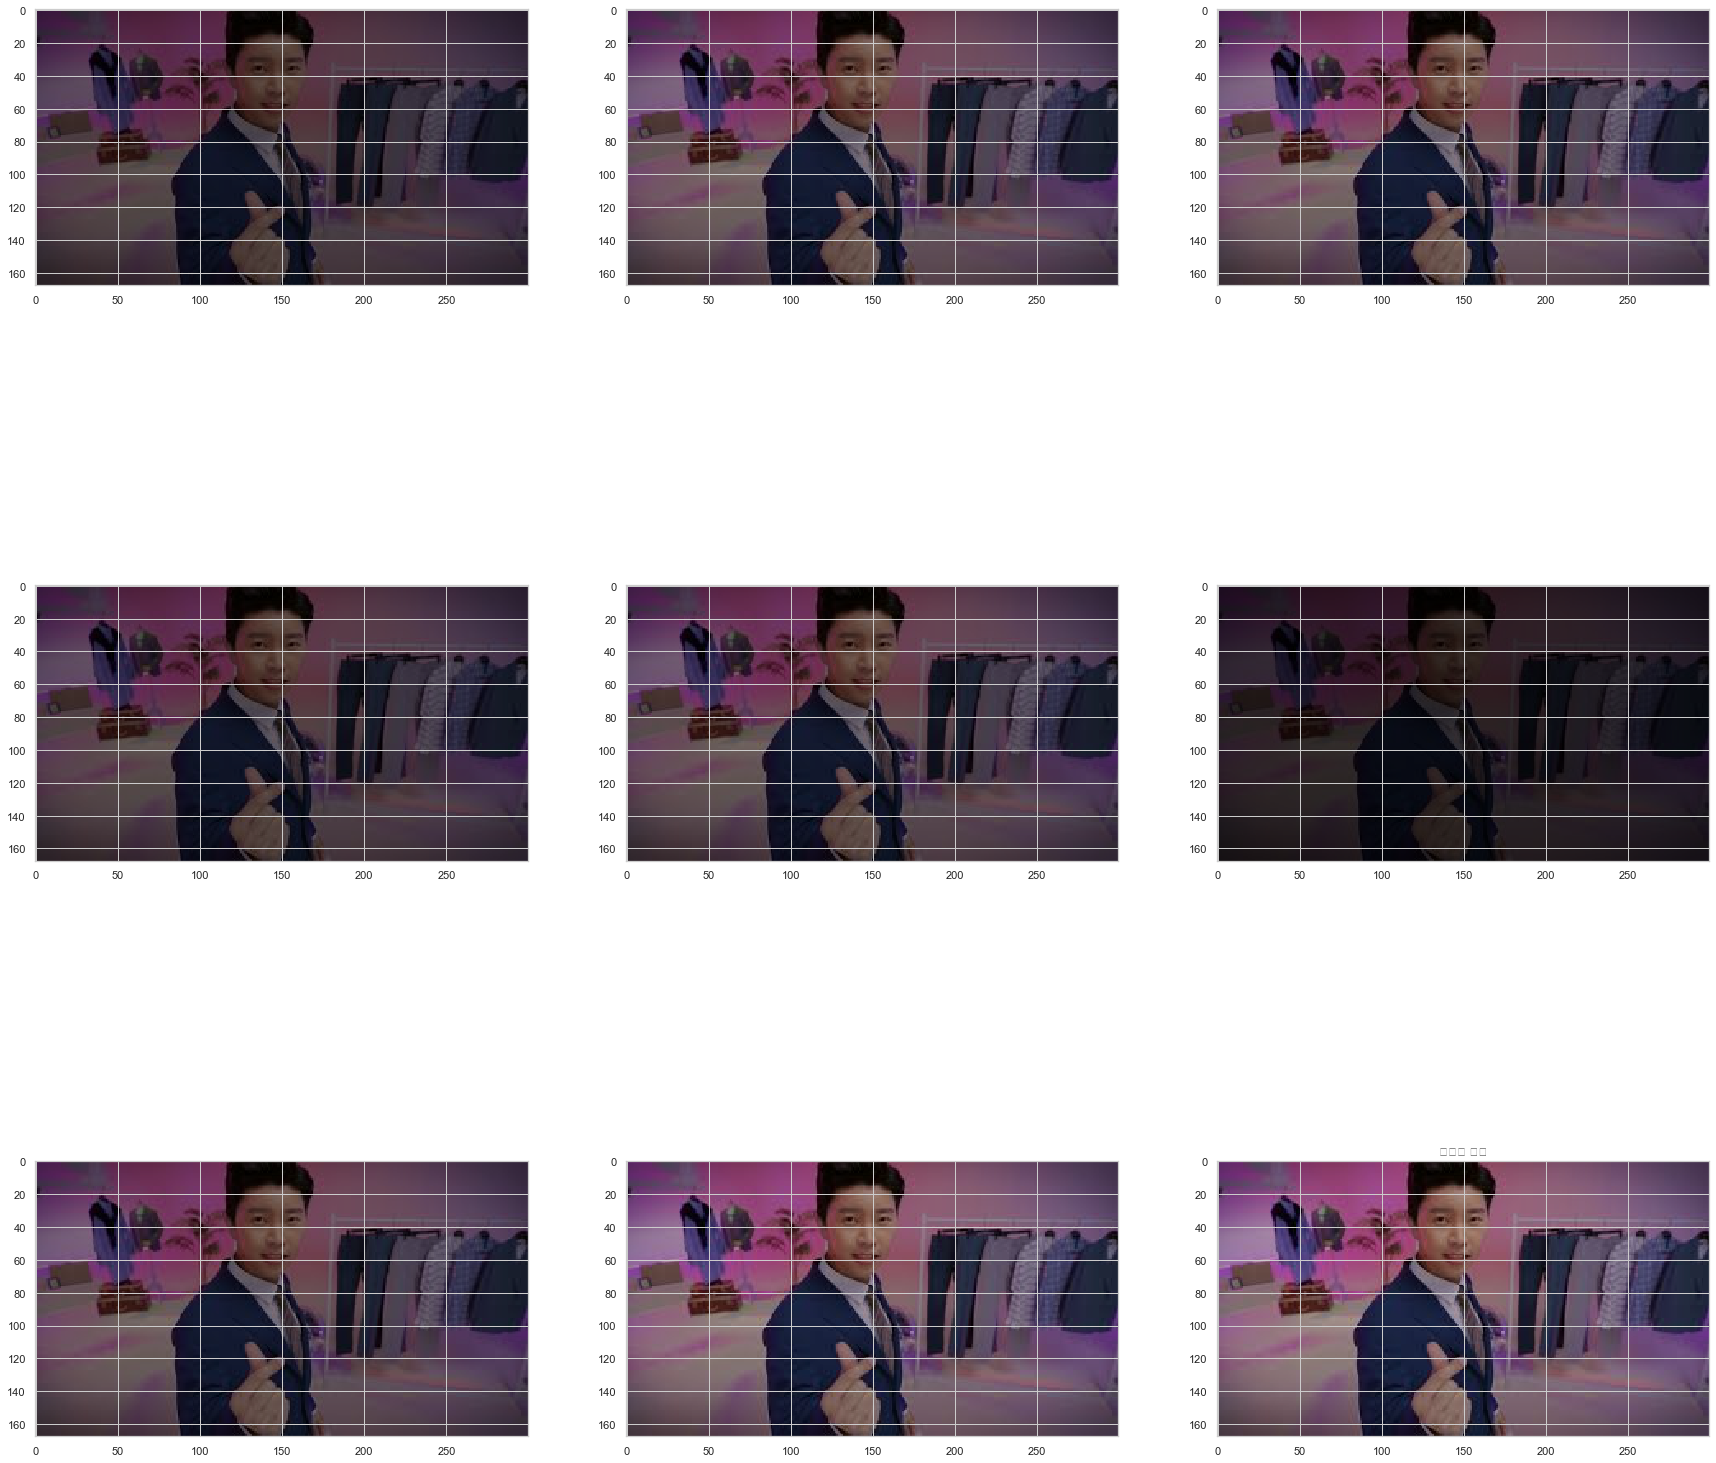

In [16]:
samples=np.expand_dims(data,0)

datagen=ImageDataGenerator(brightness_range=[0.2, 0.8])
#0에 가까우면 어둡 1에가까우면 밝음
it= datagen.flow(samples, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(330+i+1)
    batch=it.next()
    image=batch[0].astype('uint8') #출력용
    plt.imshow(image)
plt.title("이미지 증식")
plt.show()

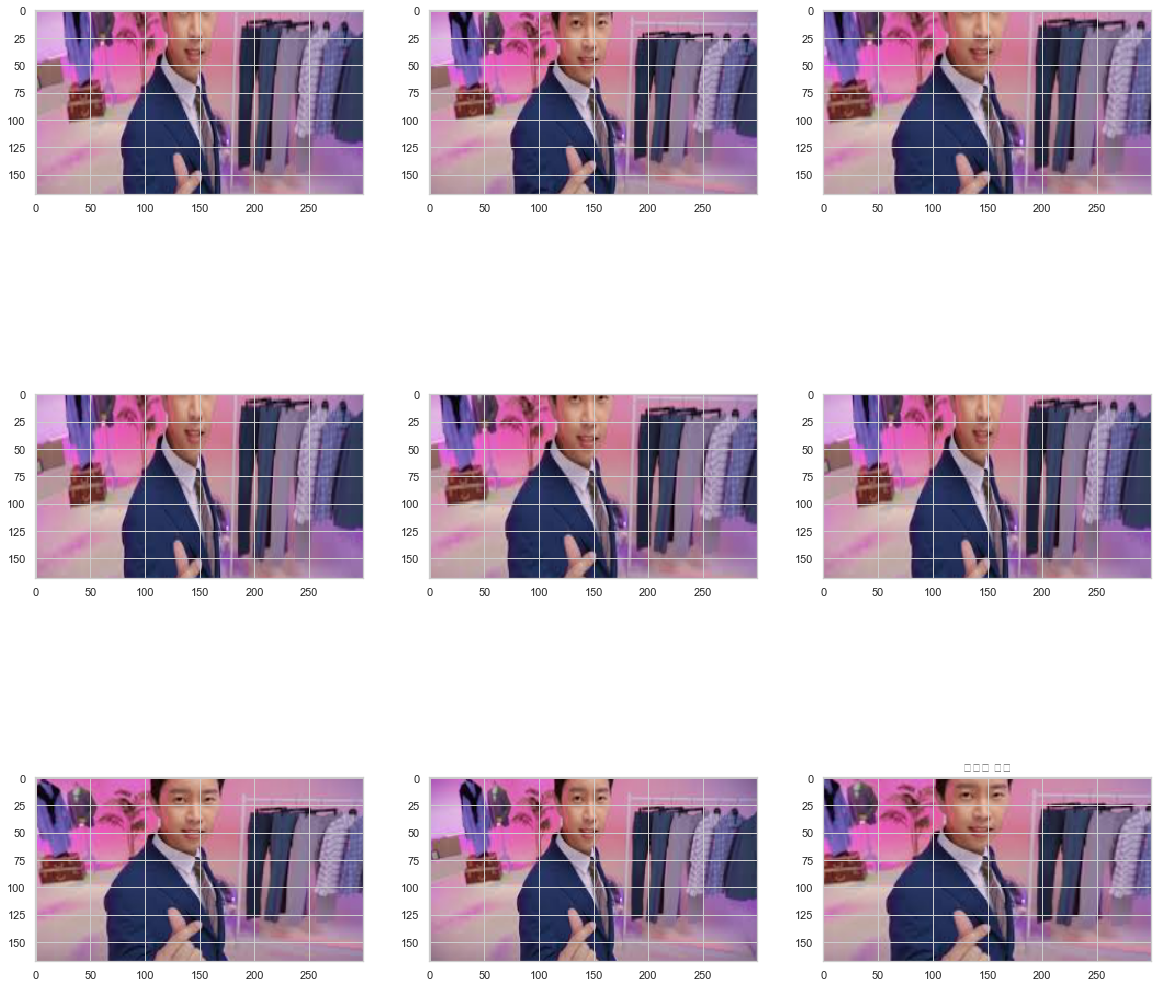

In [20]:
samples=np.expand_dims(data,0)

datagen=ImageDataGenerator(zoom_range=[0.5,1.0])

it= datagen.flow(samples, batch_size=1)
fig=plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(330+i+1)
    batch=it.next()
    image=batch[0].astype('uint8') #출력용
    plt.imshow(image)
plt.title("이미지 증식")
plt.show()

<h2>도형 다중 분류기 

In [24]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
# numpy, matplotlib.pyplot
%matplotlib inline
from sklearn.model_selection import train_test_split
# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


In [28]:
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [21]:
trainDatagen=ImageDataGenerator(rescale=1./255)


In [23]:
trainDatagen.flow_from_directory# 트레인데이터
trainDatagen = ImageDataGenerator(rescale=1./225) # 이미지 증식기
trainGenerator = trainDatagen.flow_from_directory('train', target_size=(24,24), 
                                                            batch_size=3, 
                                                            class_mode='categorical')
# 테스트 데이터
testDatagen = ImageDataGenerator(rescale=1./225) # 이미지 증식기
testGenerator = testDatagen.flow_from_directory('test', target_size=(24,24), 
                                                            batch_size=3, 
                                                            class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [29]:
#CNN모델구성
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [31]:
model.fit_generator(trainGenerator, steps_per_epoch=15, epochs=50, 
    validation_data=testGenerator, validation_steps=5) #훈련데이터셋을 제공할 제너레이터
#1에폭당 스텝수, 데이터 개수45

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
15/15 [==============================] - 0s 18ms/step - loss: 1.3371 - accuracy: 0.4444 - val_loss: 0.7760 - val_accuracy: 0.6667
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 0.4067 - accuracy: 0.8444 - val_loss: 0.1967 - val_accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0790 - accuracy: 0.9778 - val_loss: 0.0375 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0432 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 16ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0458 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 11ms/step - loss: 6.4086e-04 - accuracy: 1.0000 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 11ms/step - loss: 3

In [37]:
#모델평가
scores = model.evaluate_generator(testGenerator, steps=5)
print("정확도:",scores[1]*100,"%")
#scores[1] <정확도 


정확도: 100.0 %


In [39]:
#모델 사용
output =model.predict_generator(testGenerator, steps=5)
print(testGenerator.class_indices)
print(output)

{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[9.9999952e-01 4.2822234e-07 4.9147015e-08]
 [2.7047497e-07 1.2465155e-07 9.9999964e-01]
 [9.9997294e-01 2.6324689e-05 6.7452220e-07]
 [1.1261875e-01 7.5875729e-01 1.2862402e-01]
 [1.2776935e-06 9.9999869e-01 2.8519054e-08]
 [9.9999833e-01 1.6283993e-06 7.0881541e-09]
 [1.1235182e-05 8.3813292e-04 9.9915063e-01]
 [1.8369037e-06 9.9999785e-01 3.0624378e-07]
 [5.3318518e-06 9.9999464e-01 5.8962520e-08]
 [7.5986884e-07 7.4571199e-07 9.9999845e-01]
 [8.7675326e-06 4.2899975e-04 9.9956220e-01]
 [1.1832549e-07 1.2194325e-06 9.9999869e-01]
 [9.9999988e-01 7.1525974e-08 3.1107859e-09]
 [3.6775401e-07 9.9999964e-01 3.3890899e-08]
 [9.9995625e-01 9.2122025e-07 4.2849140e-05]]
